In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df=pd.read_csv("../datasets/diabetes_prediction_dataset.csv")
dummy=pd.read_csv("../datasets/diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [5]:
df['smoking_history'] = df['smoking_history'].replace('No Info', np.nan)

In [6]:
df.shape

(100000, 9)

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(64184, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64184 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               64184 non-null  object 
 1   age                  64184 non-null  float64
 2   hypertension         64184 non-null  int64  
 3   heart_disease        64184 non-null  int64  
 4   smoking_history      64184 non-null  object 
 5   bmi                  64184 non-null  float64
 6   HbA1c_level          64184 non-null  float64
 7   blood_glucose_level  64184 non-null  int64  
 8   diabetes             64184 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 4.9+ MB


In [10]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [11]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,64184.000000,64184.000000,64184.000000,64184.000000,64184.000000,64184.000000,64184.000000
mean,46.544112,0.097890,0.047037,28.424120,5.564281,139.628225,0.109778
std,19.540334,0.297169,0.211719,6.516199,1.095519,42.165904,0.312615
min,0.160000,0.000000,0.000000,10.080000,3.500000,80.000000,0.000000
25%,31.000000,0.000000,0.000000,24.600000,4.800000,100.000000,0.000000
50%,47.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,61.000000,0.000000,0.000000,31.100000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,91.820000,9.000000,300.000000,1.000000


In [12]:
df['gender'] = df['gender'].map({'Female':0, 'Male':1})
df['smoking_history'] = df['smoking_history'].map({'never': 0, 'current': 1, 'former': 2, 'ever': 3, 'not current': 4})

In [13]:
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,0,25.19,6.6,140,0
2,1.0,28.0,0,0,0,27.32,5.7,158,0
3,0.0,36.0,0,0,1,23.45,5.0,155,0
4,1.0,76.0,1,1,1,20.14,4.8,155,0
5,0.0,20.0,0,0,0,27.32,6.6,85,0


In [14]:
df['diabetes'].value_counts()

diabetes
0    57138
1     7046
Name: count, dtype: int64

In [15]:
X=df.drop(columns='diabetes',axis=1)
Y=df['diabetes']

### RANDOM FOREST

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x = df.drop(['diabetes'],axis = 1)
y = df['diabetes']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,stratify=Y,random_state=2)

In [17]:
model=RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [18]:
X_train_prediction=model.predict(X_train)
train_prediction_accuracy=accuracy_score(X_train_prediction,Y_train)*100
print('Accuracy on Training data : ', train_prediction_accuracy)

Accuracy on Training data :  99.94352152998228


In [19]:
X_test_prediction=model.predict(X_test)
test_prediction_accuracy=accuracy_score(X_test_prediction,Y_test)*100
print('Accuracy on Testing data : ', test_prediction_accuracy)

Accuracy on Testing data :  96.1439588688946


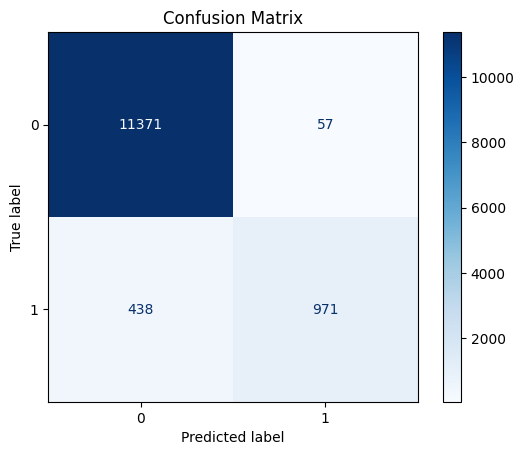

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     11428
           1       0.94      0.69      0.80      1409

    accuracy                           0.96     12837
   macro avg       0.95      0.84      0.89     12837
weighted avg       0.96      0.96      0.96     12837



In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(Y_test, y_pred))


### DECISION TREE

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [22]:
x_train_prediction=dtc.predict(X_train)
dtc_train_prediction_accuracy=accuracy_score(x_train_prediction,Y_train)*100
print('Accuracy on Training data : ', dtc_train_prediction_accuracy)

Accuracy on Training data :  99.94546906343118


In [23]:
x_test_prediction=dtc.predict(X_test)
dtc_test_prediction_accuracy=accuracy_score(x_test_prediction,Y_test)*100
print('Accuracy on Testing data : ', dtc_test_prediction_accuracy)

Accuracy on Testing data :  93.55768481732491


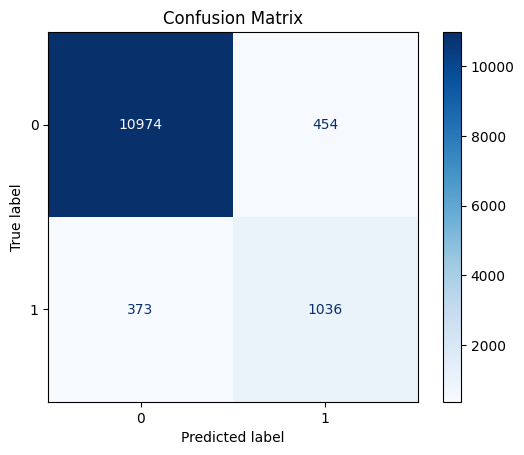

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96     11428
           1       0.70      0.74      0.71      1409

    accuracy                           0.94     12837
   macro avg       0.83      0.85      0.84     12837
weighted avg       0.94      0.94      0.94     12837



In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = dtc.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(Y_test, y_pred))

### ACCURACY

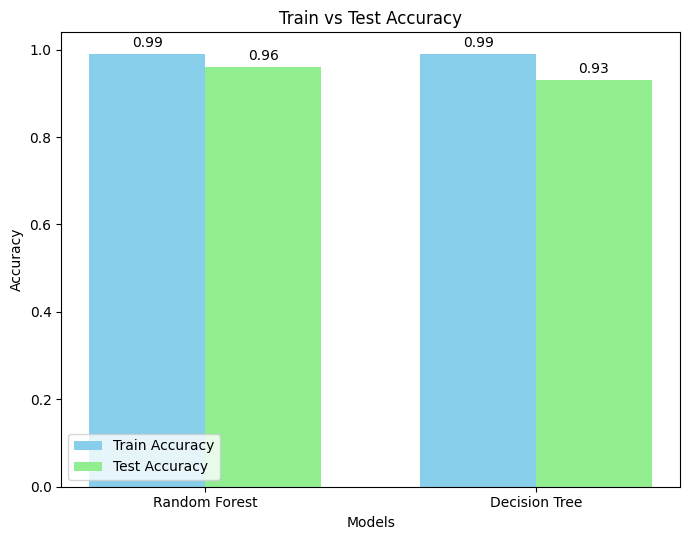

In [ ]:
import numpy as np
train_accuracy = [0.99, 0.99] 
test_accuracy = [0.96, 0.93]   

models = ['Random Forest', 'Decision Tree']
X = np.arange(len(models))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(7,5.5))

# Bars for Train and Test
rects1 = ax.bar(X - width/2, train_accuracy, width, label='Train Accuracy', color='skyblue')
rects2 = ax.bar(X + width/2, test_accuracy, width, label='Test Accuracy', color='lightgreen')

# Labels and Title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Train vs Test Accuracy')
ax.set_xticks(X)
ax.set_xticklabels(models)
ax.legend()

# Add accuracy labels on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()

### EXPORTING MODEL

In [27]:
import pickle

diabetes_model = '../models/diabetes_prediction_model.sav'
pickle.dump(model, open(diabetes_model, 'wb'))

C:\Users\Akash_PC\AppData\Local\Temp\ipykernel_34784\466393414.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="magma")


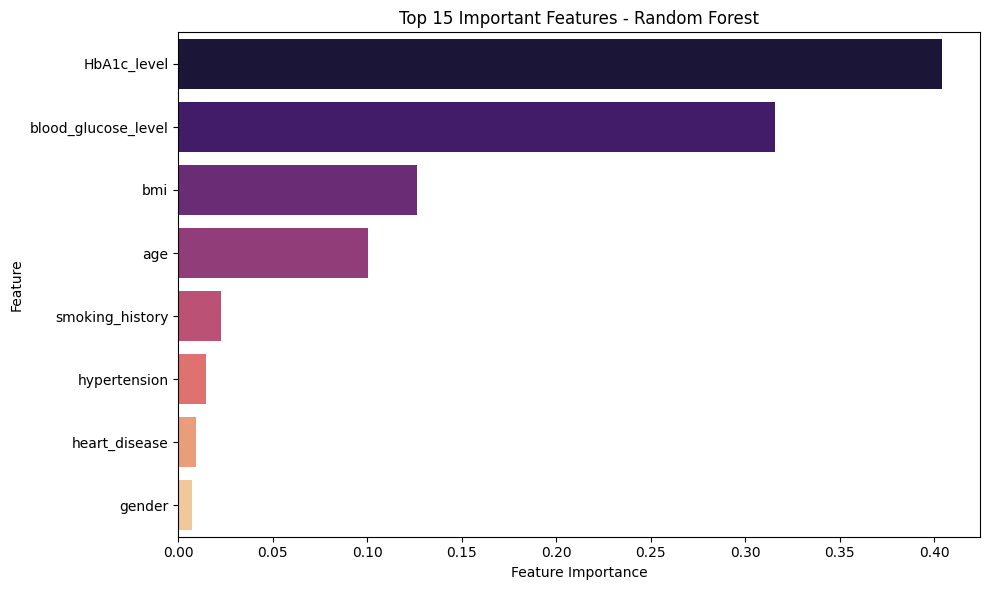

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.Series(model.feature_importances_, index=x.columns)
top_features = feature_importance.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="magma")
plt.title("Top 15 Important Features - Random Forest")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


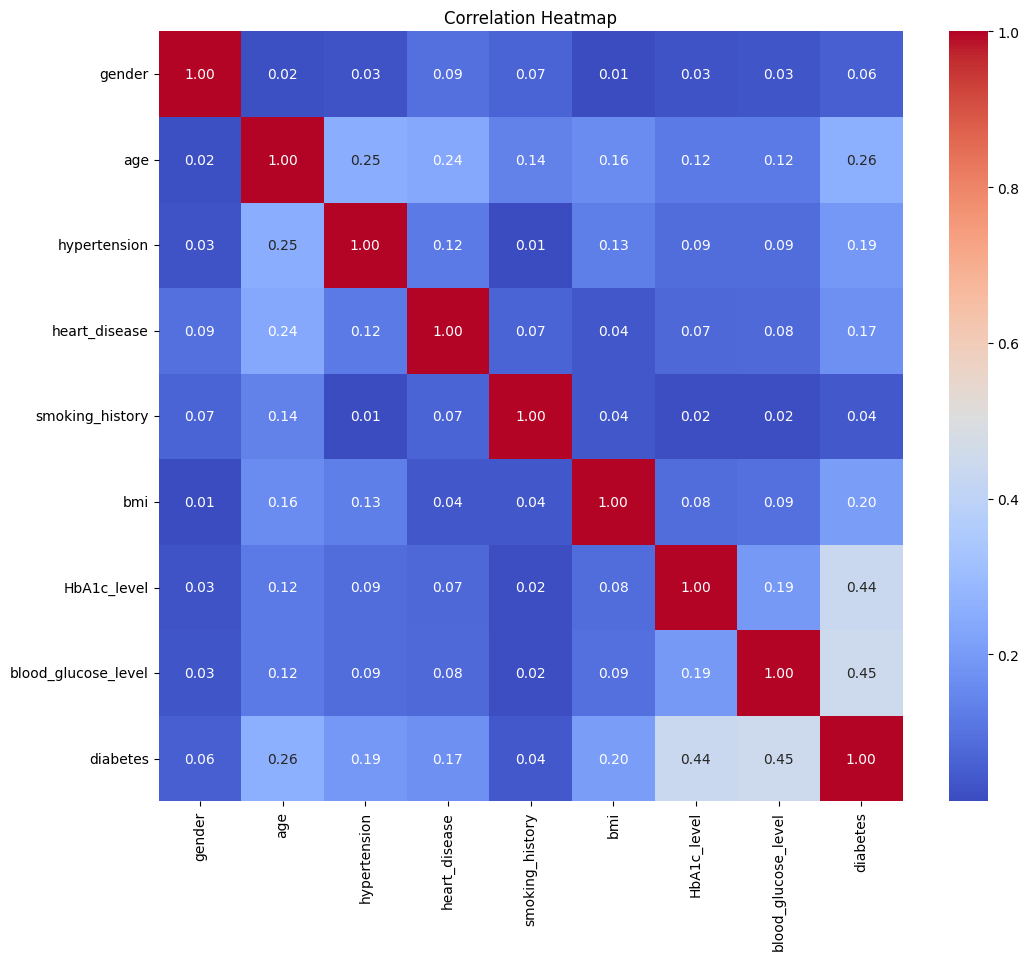

In [29]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [30]:
df.to_csv('..\datasets\Diabetes(Cleaned).csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Akash_PC\AppData\Local\Temp\ipykernel_34784\2325211505.py:1: SyntaxWarning: invalid escape sequence '\d'
  df.to_csv('..\datasets\Diabetes(Cleaned).csv')
